# Aygaz Veri Analizi

İş Problemi :  [Airbnb](https://https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data) veri setinin analizini gerçekleştirmek istiyoruz.

Veri Setinin Hikayesi : 2008'den bu yana konuklar ve ev sahipleri, seyahat olanaklarını genişletmek ve dünyayı daha benzersiz, kişiselleştirilmiş bir şekilde deneyimlemek için Airbnb'yi kullanıyor. Bu veri seti, 2019 yılında New York şehrinde yer alan Airbnb uygulaması verilerini içermektedir.

# Değişkenler
* id: Konaklama biriminin benzersiz tanımlayıcısı (unique identifier).

* name: Konaklama biriminin adı.

* host_id: Ev sahibinin benzersiz tanımlayıcısı (unique identifier).

* host_name: Ev sahibinin ismi.

* neighbourhood_group: New York şehri içindeki beş büyük bölgeden biri.

* neighbourhood: New York şehri içindeki mahallelerden biri.

* latitude: Konaklama biriminin enlem değeri.

* longitude: Konaklama biriminin boylam değeri.

* room_type: Konaklama biriminin tipi

* price: Konaklama biriminin gecelik ücreti.

* minimum_nights: En az konaklama süresi .

* number_of_reviews: Toplam yapılmış yorum sayısı.

* last_review: En son yapılmış yorum tarihi.

* reviews_per_month: Aylık ortalama yorum sayısı.

* calculated_host_listings_count: Ev sahibinin toplam ilan sayısı.

* availability_365: Yıl boyunca müsaitlik durumu, 365 gün.

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np



In [ ]:
df= pd.read_csv("AB_NYC_2019.csv")

In [ ]:
sns.set(rc={'figure.figsize':(6,4)})
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option("display.float_format", lambda x: "%.5f" % x)

In [ ]:
#Veri setimizi hızlıca tanıyabilmek için meet_df adında bir fonksiyon oluşturuyoruz.

def check_df(dataframe, head=5):
  print("######### SHAPE ###########")
  print(dataframe.shape)
  print("######## Types #######")
  print(dataframe.dtypes)
  print("######## HEAD #########")
  print(dataframe.head(head))
  print("######### TAİL ########")
  print(dataframe.tail(head))
  print("######## Boş Değerler #####")
  print(dataframe.isnull().sum())
  print("######## Describe #####")
  print(dataframe.describe().T)

In [ ]:
check_df(df)

######### SHAPE ###########
(29203, 16)
######## Types #######
id                                  int64
name                               object
host_id                           float64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                    float64
number_of_reviews                 float64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count    float64
availability_365                  float64
dtype: object
######## HEAD #########
     id                                              name    host_id  \
0  2539                Clean & quiet apt home by the park 2787.00000   
1  2595                             Skylit Midtown Castle 2845.00000   
2  3647    

In [ ]:
# Price Değişkeninde bazı değerler 0 idi. Bunu yaşadıkları bölgenin ortalaması ile doldurduk
df['price'] = df['price'].replace(0, float('nan'))

In [ ]:
df['price'] = df.groupby('neighbourhood_group')['price'].transform(lambda x: x.fillna(x.mean()))

# Değişken Analizleri

In [ ]:
df.price.describe().T

count   29202.00000
mean      148.26705
std       226.24363
min        10.00000
25%        70.00000
50%       109.00000
75%       174.00000
max     10000.00000
Name: price, dtype: float64

In [ ]:
# Numerik ve Kategorik Değişken için gerekli Fonksyin

def grab_col_names(dataframe, cat_th=10, car_th=20):
  """
  *******
  Parametreler
  ------
    dataframe : dataframe
       Değişken isimleri alınmak istenen DataFrame'dir.

    cat_th :  int / float
        Numerik fakat kategorik olan değişkenler için sınıf eşiği

    car_th : int / float
      Kategorik fakat kardinal olan değişkenler için sınıf eşiği


  Returns
   ------
    cath_cols : list
         Kategorik değişken listesi
    num_cols : list
        Numerik değişken listesi
    cat_but_car :
        Kategorik gözüken fakat kardinal olan değişken listesi


  Notes :
  -----
    cath_cols + num_cols + cat_but_car = Toplam Değişken Sayısı
    -----------
    """
  cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
  num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                 dataframe[col].dtypes != "O"]
  cat_but_car = [col for col in dataframe.columns if
                 dataframe[col].nunique() > car_th and dataframe[col].dtypes == "O"]
  cat_cols = cat_cols + num_but_cat
  cat_cols = [col for col in cat_cols if col not in cat_but_car]

  num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
  num_cols = [col for col in num_cols if col not in num_but_cat]


  print(f"Obervations: {dataframe.shape[0]}")
  print(f"Variables: {dataframe.shape[1]}")
  print(f"cat_cols: {len(cat_cols)}")
  print(f"num_cols: {len(num_cols)}")
  print(f"cat_but_car: {len(cat_but_car)}")
  print(f"num_but_cat: {len(num_but_cat)}")

  return cat_cols, num_cols, cat_but_car

In [ ]:
df["last_review"] = df["last_review"].apply(pd.to_datetime)

In [ ]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Obervations: 29203
Variables: 16
cat_cols: 2
num_cols: 11
cat_but_car: 3
num_but_cat: 0


In [ ]:
print(cat_cols)
print(num_cols)
print(cat_but_car)

['neighbourhood_group', 'room_type']
['id', 'host_id', 'latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']
['name', 'host_name', 'neighbourhood']


Burada gereksiz gördüğümüz bazı kardinal değişkenleri veri setinden çıkartabiliriz. Bu insiyatife bağlı bir durumdur. Bu çalışmada hiçbir değişken çıkartılmayacak.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29203 entries, 0 to 29202
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              29203 non-null  int64         
 1   name                            29187 non-null  object        
 2   host_id                         29202 non-null  float64       
 3   host_name                       29184 non-null  object        
 4   neighbourhood_group             29202 non-null  object        
 5   neighbourhood                   29202 non-null  object        
 6   latitude                        29202 non-null  float64       
 7   longitude                       29202 non-null  float64       
 8   room_type                       29202 non-null  object        
 9   price                           29202 non-null  float64       
 10  minimum_nights                  29202 non-null  float64       
 11  nu

In [ ]:
# Kategorik Değişken Analizi
def cat_summary(dataframe, col_name, plot=False):

  print(pd.DataFrame({col_name : dataframe[col_name].value_counts(),
                      "Ratio" : 100* dataframe[col_name].value_counts() / len(dataframe)}))
  print("###########################")
  if plot:
    sns.countplot(x=dataframe[col_name], data=dataframe)


               neighbourhood_group    Ratio
Manhattan                    13069 44.75225
Brooklyn                     12642 43.29007
Queens                        2812  9.62915
Bronx                          501  1.71558
Staten Island                  178  0.60953
###########################
neighbourhood_group None
                 room_type    Ratio
Entire home/apt      15586 53.37123
Private room         13113 44.90292
Shared room            503  1.72243
###########################
room_type None


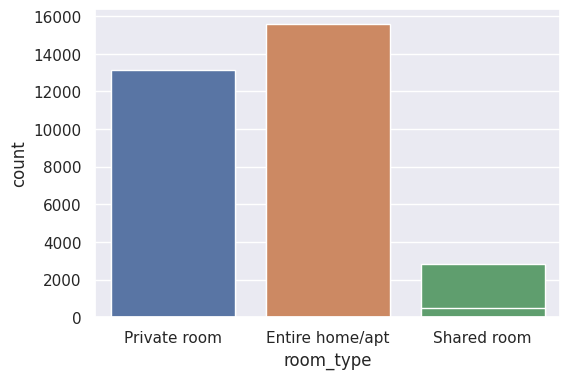

In [ ]:
for col in cat_cols:
  print(col, cat_summary(df, col, True))

In [ ]:
# Numerik Değişken Analizi

def num_summary(dataframe, num_cols, plot=False):
  quantiles = [0.05, 0.10, 0.25, 0.50, 0.60, 0.75, 0.90, 0.95, 0.99]
  print(dataframe[num_cols].describe(quantiles).T)


  if plot:
    dataframe[num_cols].hist(bins=20)
    plt.xlabel(num_cols)
    plt.title(num_cols)
    plt.show()

count      29203.00000
mean    11415305.81057
std      6882950.75751
min         2539.00000
5%        654270.00000
10%      1683375.20000
25%      5371021.50000
50%     11529406.00000
60%     13779511.60000
75%     17608495.00000
90%     20955126.60000
95%     21771482.80000
99%     22281851.56000
max     22409935.00000
Name: id, dtype: float64


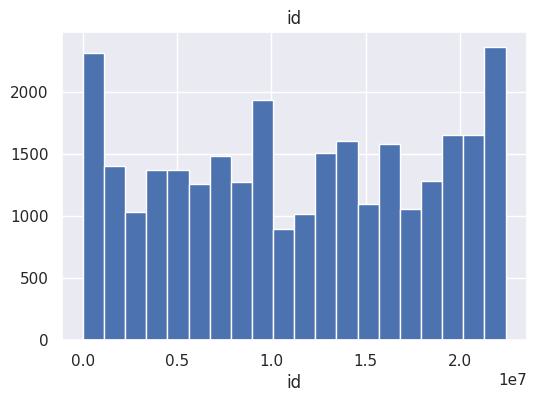

id None
count       29202.00000
mean     34182263.77228
std      40066329.80315
min          2571.00000
5%         503567.25000
10%       1409899.20000
25%       4843861.75000
50%      18129990.50000
60%      26377263.00000
75%      48055192.75000
90%     100684069.90000
95%     131373050.90000
99%     158087650.13000
max     164048400.00000
Name: host_id, dtype: float64


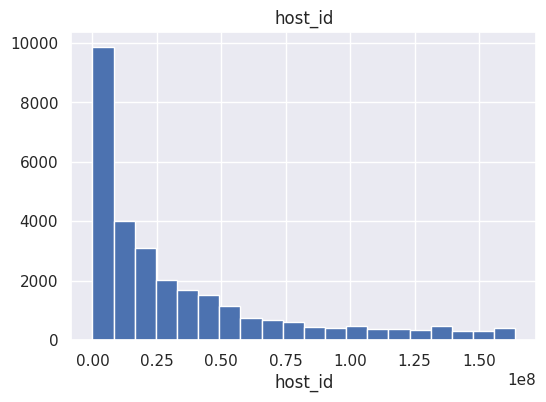

host_id None
count   29202.00000
mean       40.72914
std         0.05371
min        40.49979
5%         40.65015
10%        40.66926
25%        40.68935
50%        40.72275
60%        40.73569
75%        40.76385
90%        40.80487
95%        40.82453
99%        40.86348
max        40.91169
Name: latitude, dtype: float64


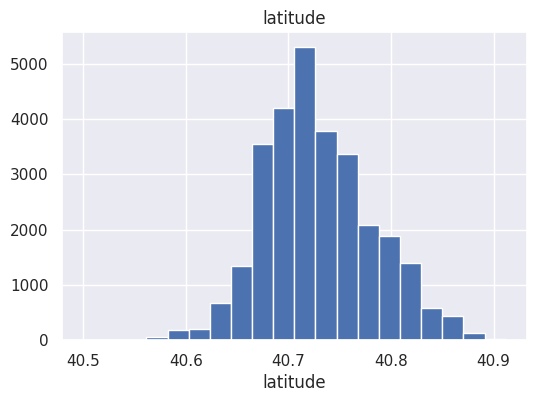

latitude None
count   29202.00000
mean      -73.95465
std         0.04184
min       -74.24285
5%        -74.00225
10%       -73.99557
25%       -73.98261
50%       -73.95674
60%       -73.95060
75%       -73.93986
90%       -73.91448
95%       -73.88698
99%       -73.79162
max       -73.71299
Name: longitude, dtype: float64


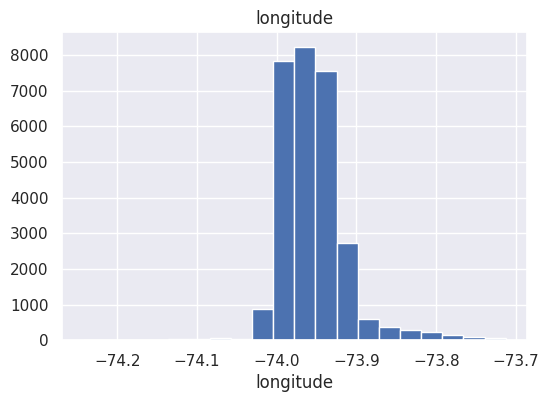

longitude None
count   29202.00000
mean      148.26705
std       226.24363
min        10.00000
5%         41.00000
10%        50.00000
25%        70.00000
50%       109.00000
60%       129.00000
75%       174.00000
90%       250.00000
95%       349.00000
99%       750.00000
max     10000.00000
Name: price, dtype: float64


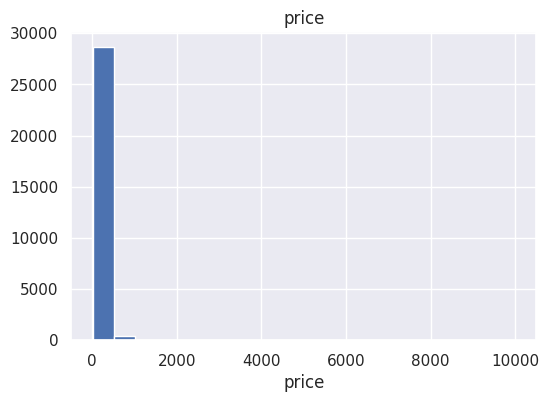

price None
count   29202.00000
mean        7.06147
std        22.48812
min         1.00000
5%          1.00000
10%         1.00000
25%         2.00000
50%         3.00000
60%         3.00000
75%         5.00000
90%        20.00000
95%        30.00000
99%        52.97000
max      1250.00000
Name: minimum_nights, dtype: float64


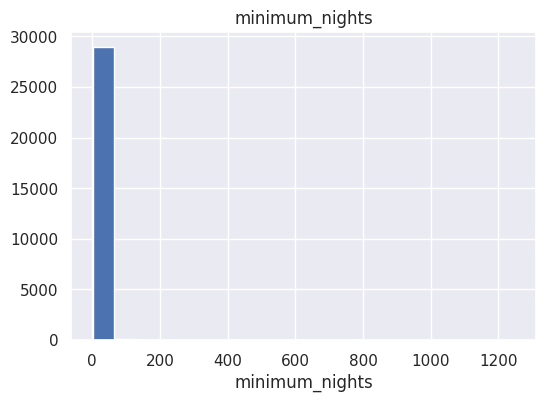

minimum_nights None
count   29202.00000
mean       32.49942
std        54.20040
min         0.00000
5%          0.00000
10%         0.00000
25%         1.00000
50%         8.00000
60%        15.00000
75%        40.00000
90%       101.00000
95%       146.00000
99%       243.00000
max       629.00000
Name: number_of_reviews, dtype: float64


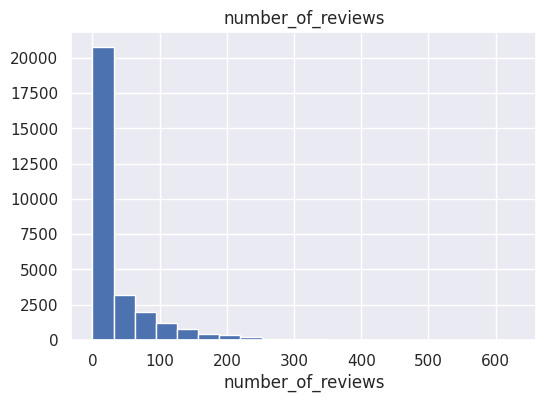

number_of_reviews None
count                   24373
unique                   1762
top       2019-06-23 00:00:00
freq                      733
first     2011-03-28 00:00:00
last      2019-07-08 00:00:00
Name: last_review, dtype: object


<ipython-input-43-6aad1dbe37c4>:5: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(dataframe[num_cols].describe(quantiles).T)


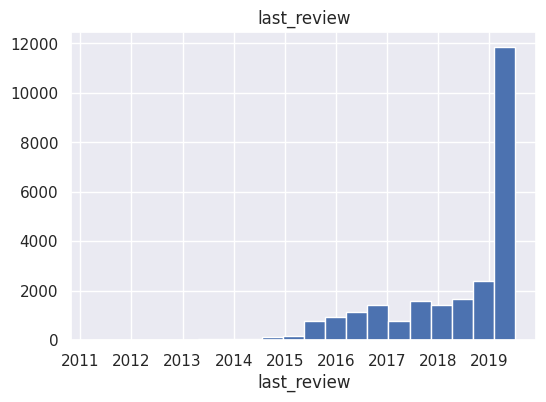

last_review None
count   24373.00000
mean        1.01948
std         1.38937
min         0.01000
5%          0.03000
10%         0.05000
25%         0.11000
50%         0.40000
60%         0.66000
75%         1.43000
90%         2.96000
95%         3.88400
99%         5.87000
max        19.75000
Name: reviews_per_month, dtype: float64


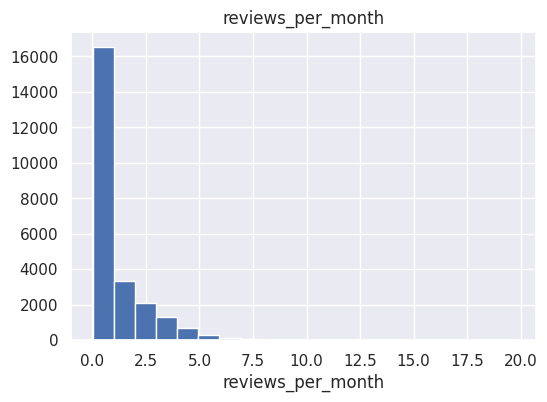

reviews_per_month None
count   29202.00000
mean        3.54325
std        12.10888
min         1.00000
5%          1.00000
10%         1.00000
25%         1.00000
50%         1.00000
60%         1.00000
75%         2.00000
90%         4.00000
95%         8.00000
99%        87.00000
max       232.00000
Name: calculated_host_listings_count, dtype: float64


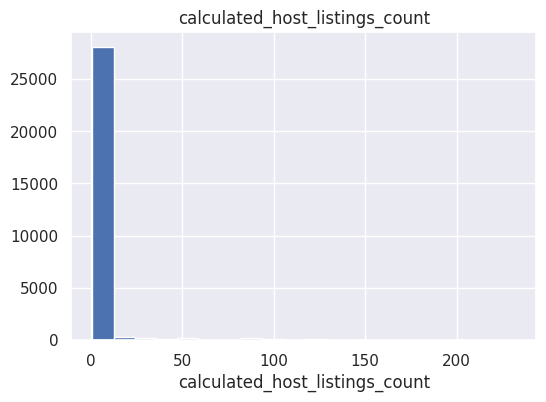

calculated_host_listings_count None
count   29202.00000
mean       99.26724
std       130.12281
min         0.00000
5%          0.00000
10%         0.00000
25%         0.00000
50%         8.00000
60%        66.00000
75%       201.00000
90%       330.00000
95%       357.00000
99%       365.00000
max       365.00000
Name: availability_365, dtype: float64


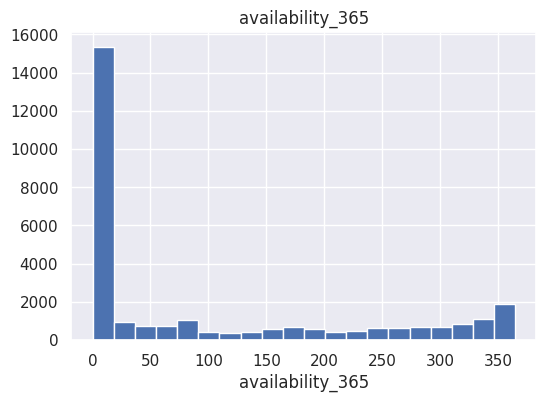

availability_365 None


In [ ]:
for col in num_cols:
  print(col, num_summary(df, col, True))

In [ ]:
for col in num_cols:
  print(col,df[col].nunique())

id 29203
host_id 24110
latitude 15047
longitude 11336
price 529
minimum_nights 90
number_of_reviews 394
last_review 1762
reviews_per_month 752
calculated_host_listings_count 40
availability_365 366


In [ ]:
for col in cat_cols:
  print(col,df[col].nunique())

neighbourhood_group 5
room_type 3


In [ ]:
#######################
# Feature Analizi
#######################



df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
id,29203.00000,11415305.81057,6882950.75751,2539.00000,5371021.50000,11529406.00000,17608495.00000,22409935.00000
host_id,29202.00000,34182263.77228,40066329.80315,2571.00000,4843861.75000,18129990.50000,48055192.75000,164048400.00000
latitude,29202.00000,40.72914,0.05371,40.49979,40.68935,40.72275,40.76385,40.91169
longitude,29202.00000,-73.95465,0.04184,-74.24285,-73.98261,-73.95674,-73.93986,-73.71299
price,29202.00000,148.26705,226.24363,10.00000,70.00000,109.00000,174.00000,10000.00000
minimum_nights,29202.00000,7.06147,22.48812,1.00000,2.00000,3.00000,5.00000,1250.00000
number_of_reviews,29202.00000,32.49942,54.20040,0.00000,1.00000,8.00000,40.00000,629.00000
reviews_per_month,24373.00000,1.01948,1.38937,0.01000,0.11000,0.40000,1.43000,19.75000
calculated_host_listings_count,29202.00000,3.54325,12.10888,1.00000,1.00000,1.00000,2.00000,232.00000
availability_365,29202.00000,99.26724,130.12281,0.00000,0.00000,8.00000,201.00000,365.00000


# Veri Görselleştirme

In [ ]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Neighbourhood Groups')

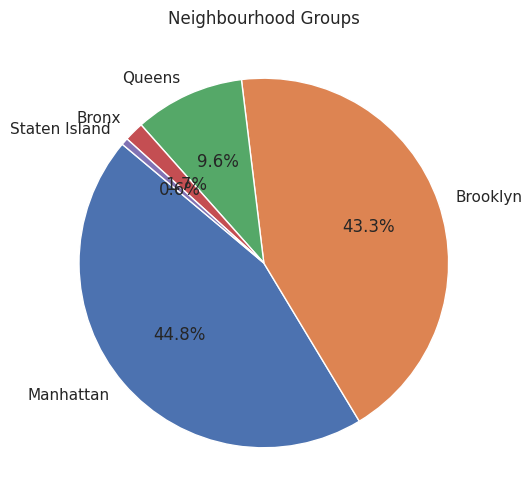

In [ ]:

group_counts = df['neighbourhood_group'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(group_counts, labels=group_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Neighbourhood Groups')


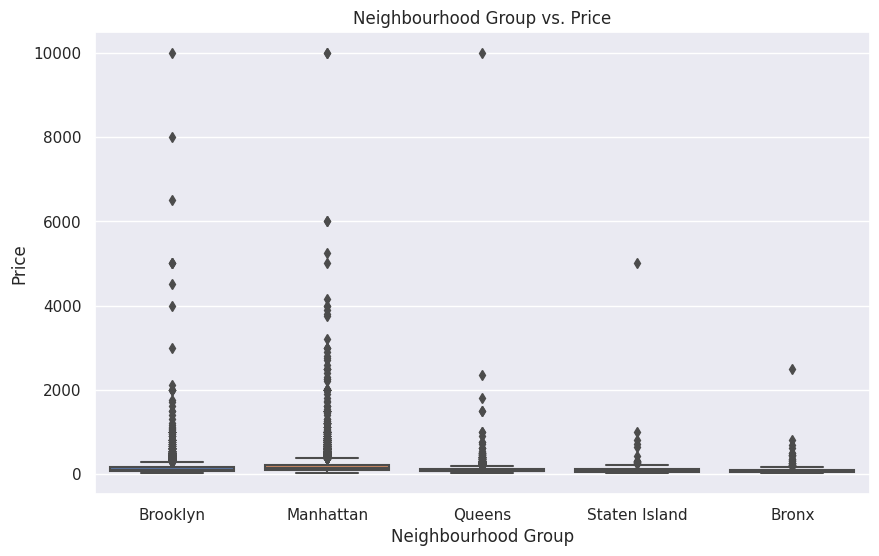

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='neighbourhood_group', y='price', data=df)
plt.title('Neighbourhood Group vs. Price')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Price')
plt.show()

Text(0.5, 1.0, 'Neighbourhood Group Frequencies')

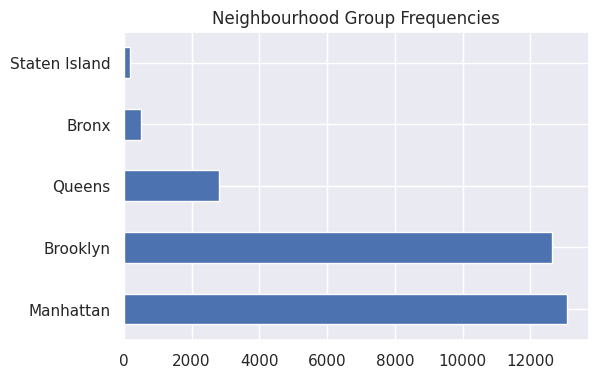

In [ ]:
df["neighbourhood_group"].value_counts().plot.barh().set_title("Neighbourhood Group Frequencies")


(array([0, 1, 2]),
 [Text(0, 0, 'Entire home/apt'),
  Text(1, 0, 'Private room'),
  Text(2, 0, 'Shared room')])

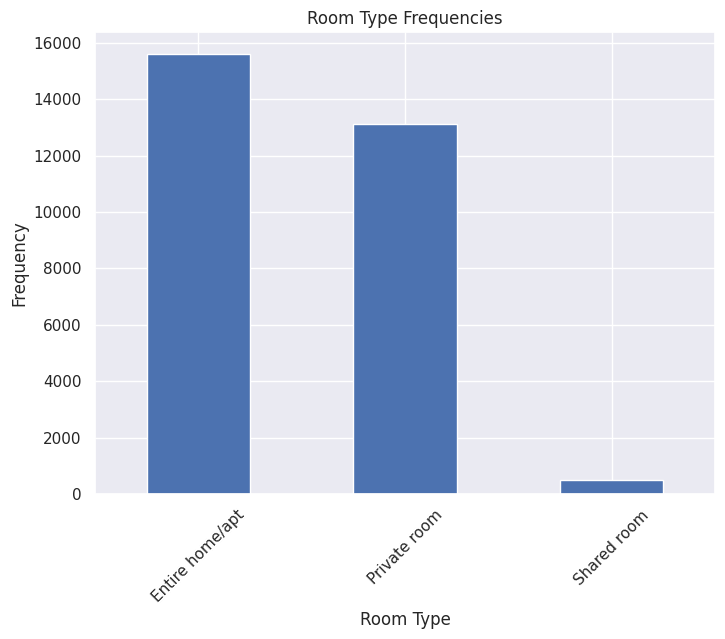

In [ ]:
room_type_counts = df['room_type'].value_counts()

plt.figure(figsize=(8, 6))
room_type_counts.plot(kind='bar')
plt.title('Room Type Frequencies')
plt.xlabel('Room Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Williamsburg'),
  Text(1, 0, 'Bedford-Stuyvesant'),
  Text(2, 0, 'Harlem'),
  Text(3, 0, 'Bushwick'),
  Text(4, 0, 'Upper West Side'),
  Text(5, 0, 'East Village'),
  Text(6, 0, 'Upper East Side'),
  Text(7, 0, 'Crown Heights'),
  Text(8, 0, "Hell's Kitchen"),
  Text(9, 0, 'Midtown')])

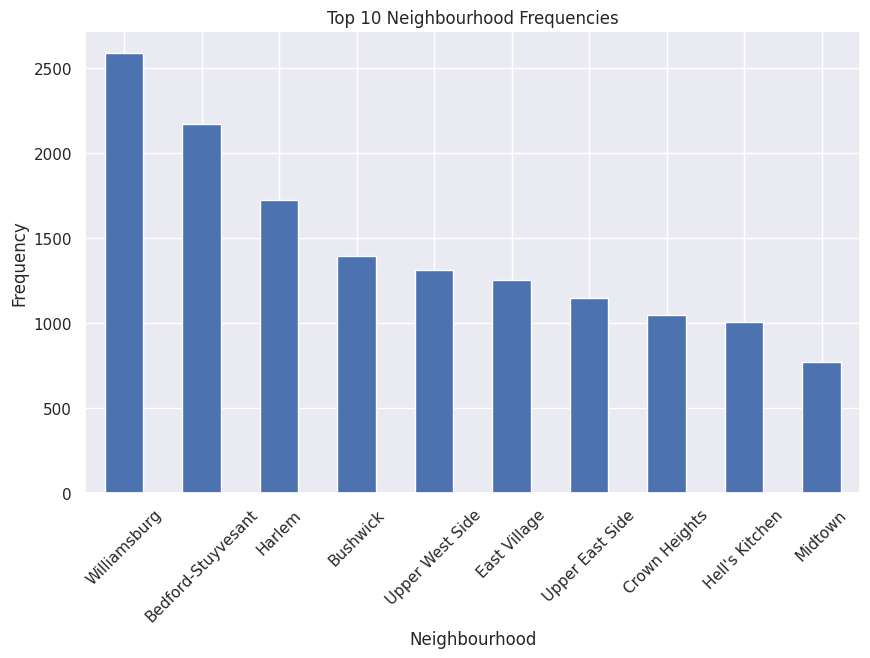

In [ ]:
neighbourhood_counts = df['neighbourhood'].value_counts().head(10)
plt.figure(figsize=(10, 6))
neighbourhood_counts.plot(kind='bar')
plt.title('Top 10 Neighbourhood Frequencies')
plt.xlabel('Neighbourhood')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

(0.0, 1000.0)

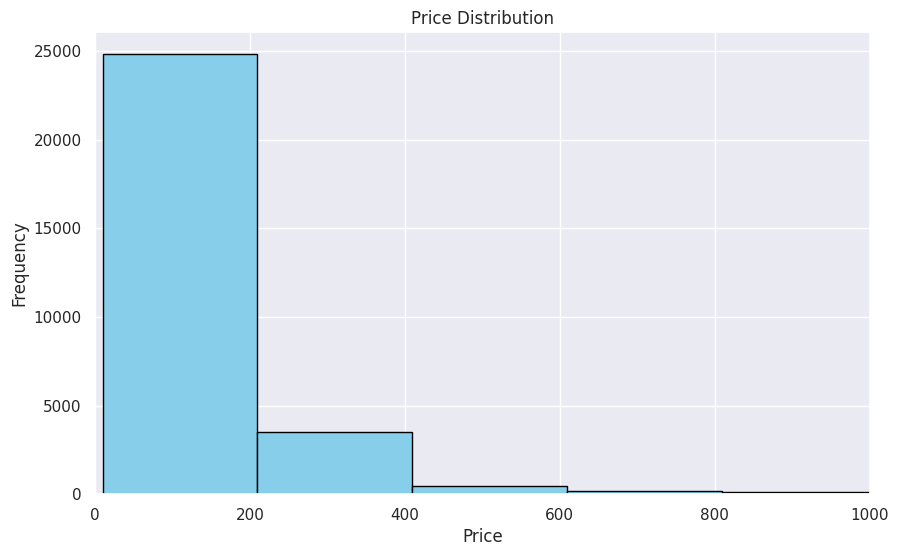

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df['price'], bins=50, color='skyblue', edgecolor='black')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.xlim(0, 1000)

Text(0.5, 1.0, 'Correlation Matrix')

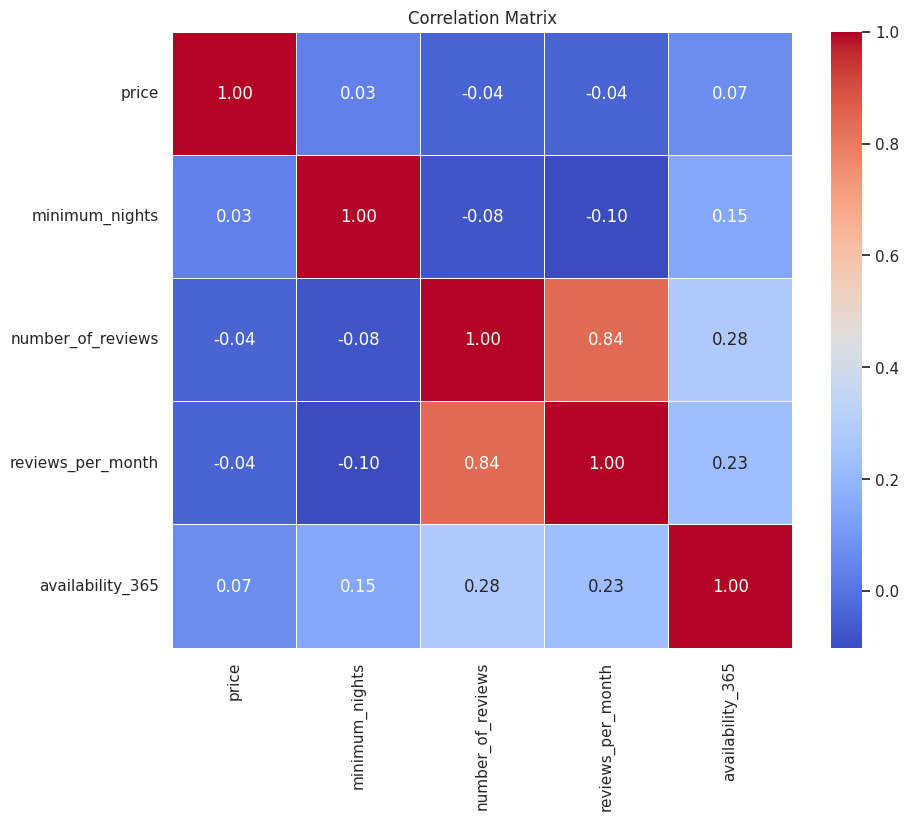

In [ ]:
correlation_matrix = df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'availability_365']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')

(array([0, 1, 2]),
 [Text(0, 0, 'Private room'),
  Text(1, 0, 'Entire home/apt'),
  Text(2, 0, 'Shared room')])

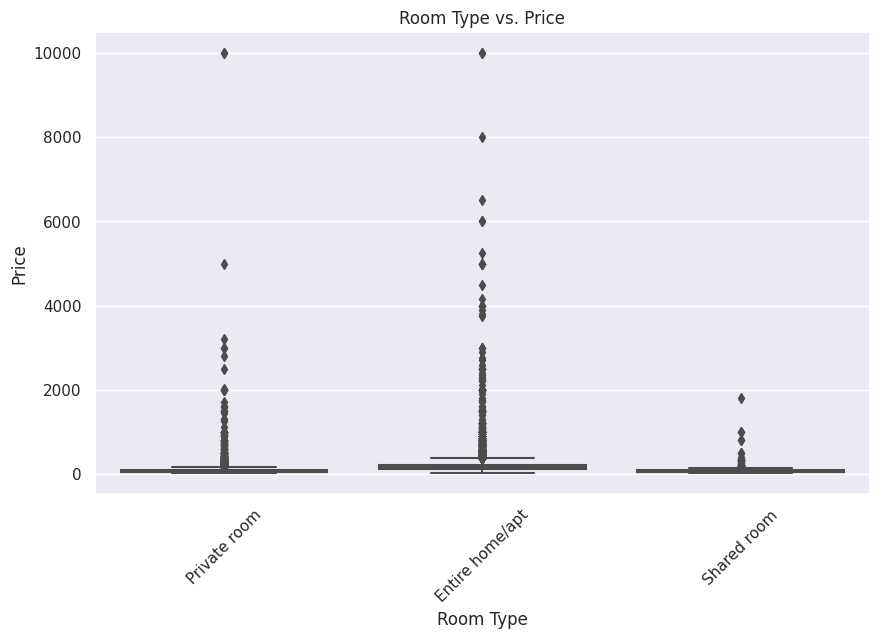

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='room_type', y='price', data=df)
plt.title('Room Type vs. Price')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.xticks(rotation=45)

(array([0, 1, 2]),
 [Text(0, 0, 'Private room'),
  Text(1, 0, 'Entire home/apt'),
  Text(2, 0, 'Shared room')])

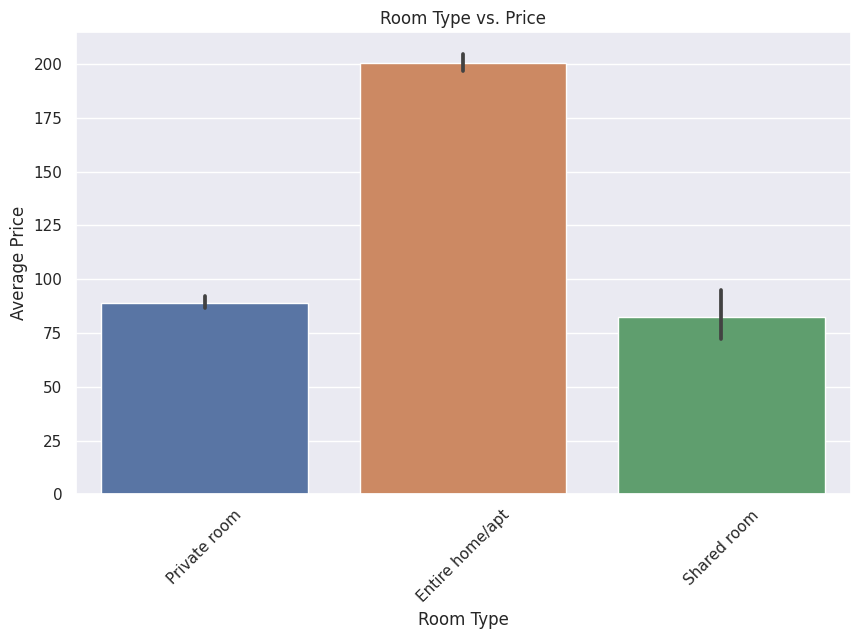

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='room_type', y='price', data=df)
plt.title('Room Type vs. Price')
plt.xlabel('Room Type')
plt.ylabel('Average Price')
plt.xticks(rotation=45)

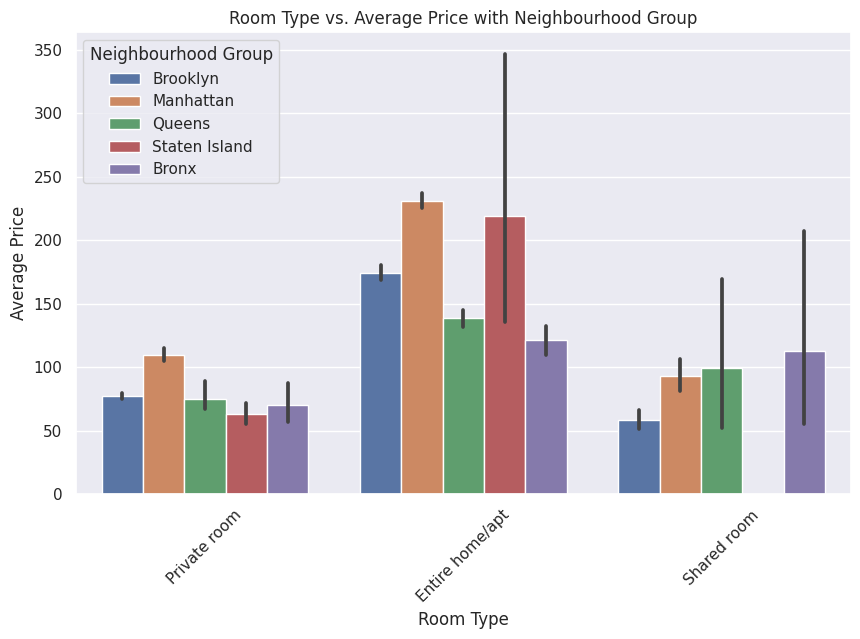

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='room_type', y='price', hue='neighbourhood_group', data=df)
plt.title('Room Type vs. Average Price with Neighbourhood Group')
plt.xlabel('Room Type')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.legend(title='Neighbourhood Group')

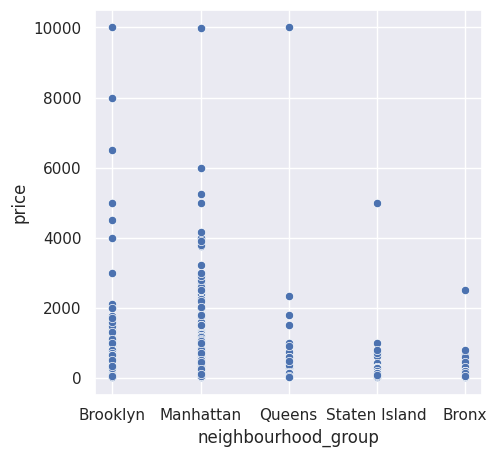

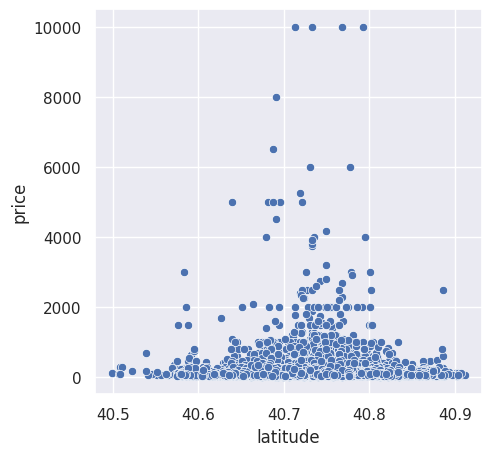

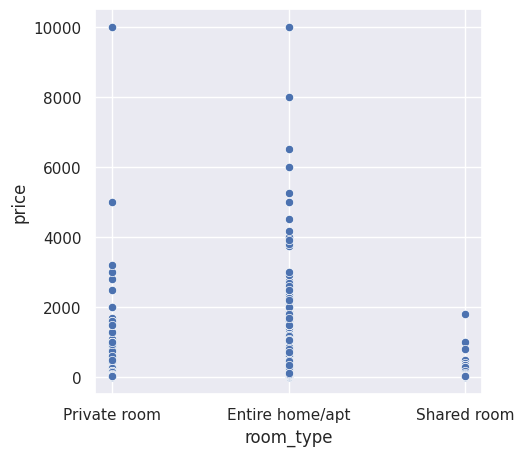

In [ ]:
cols = ["neighbourhood_group", "latitude", "room_type"]

for col in cols:
  plt.figure(figsize=(5,5))
  sns.scatterplot(x=col, y="price", data=df)

<Axes: xlabel='price', ylabel='Count'>

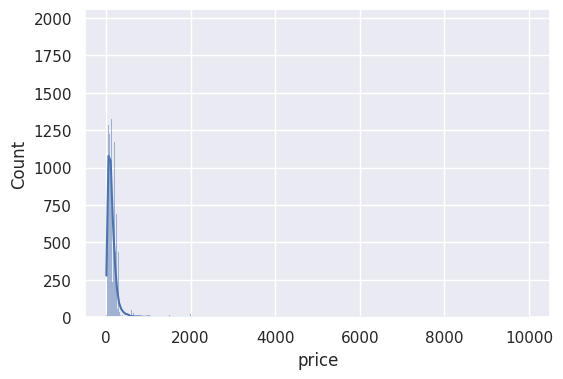

In [ ]:
sns.histplot(df["price"], kde=True)

<Figure size 700x700 with 0 Axes>

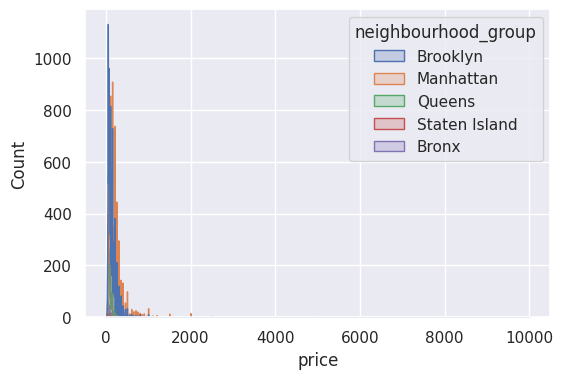

<Figure size 700x700 with 0 Axes>

In [ ]:
sns.histplot(df, x="price", hue="neighbourhood_group", element="poly")
plt.figure(figsize=(7,7))

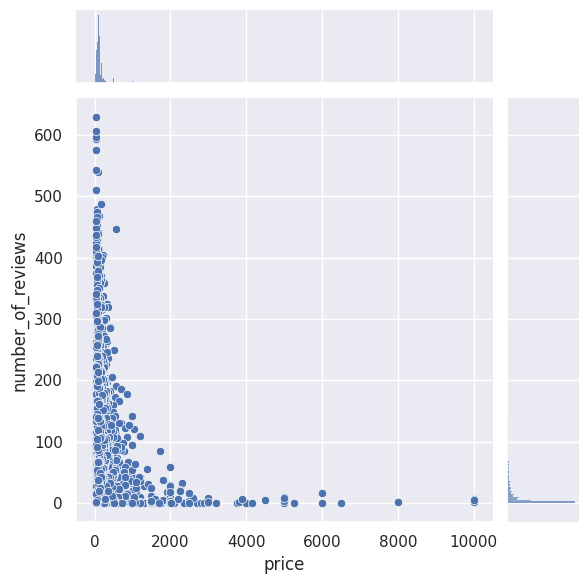

In [ ]:
sns.jointplot(x="price", y=df["number_of_reviews"], data=df)


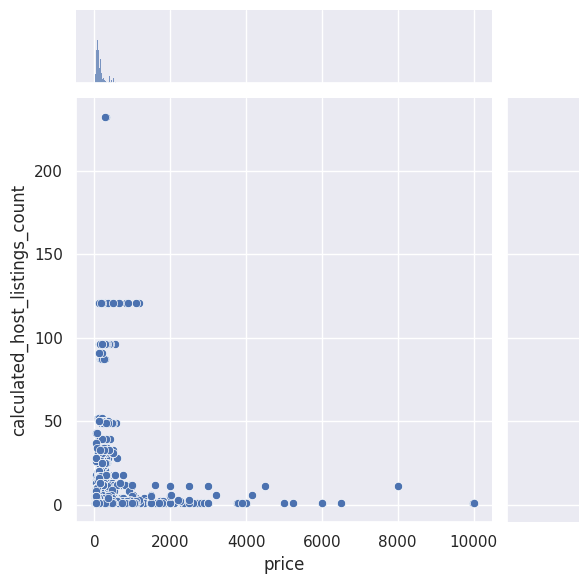

In [ ]:
sns.jointplot(x="price", y=df["calculated_host_listings_count"], data=df)


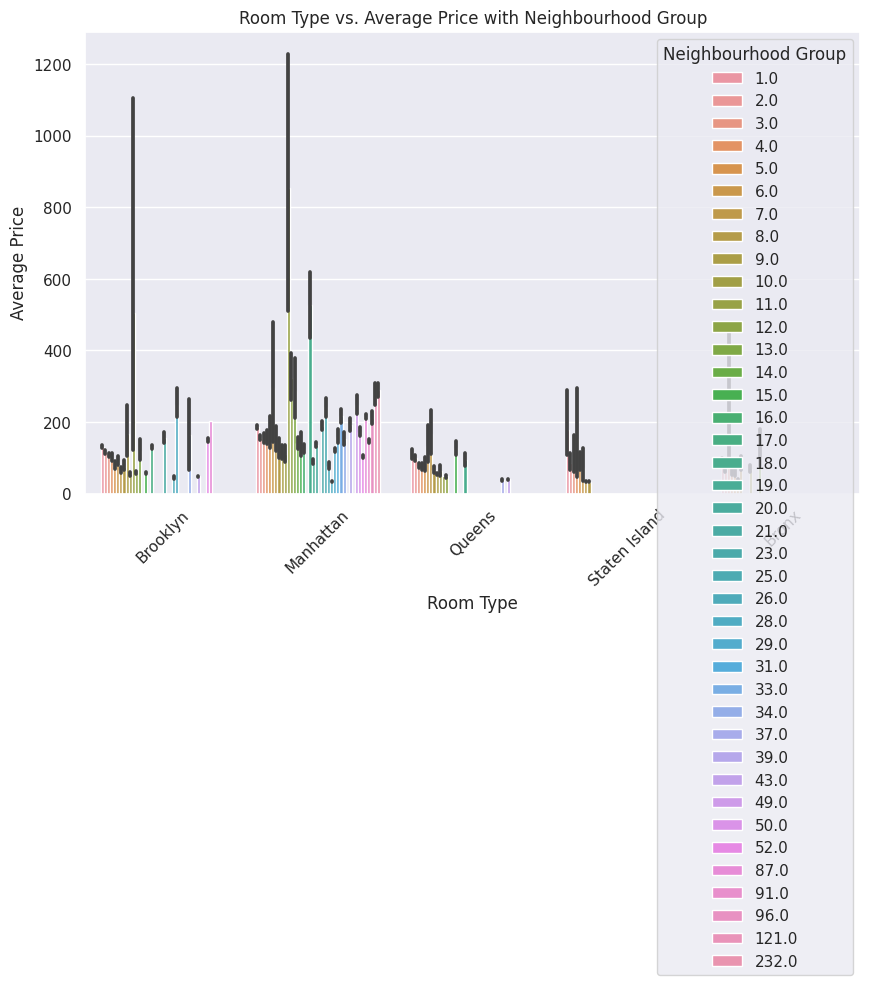

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='neighbourhood_group', y='price', hue='calculated_host_listings_count', data=df)
plt.title('Room Type vs. Average Price with Neighbourhood Group')
plt.xlabel('Room Type')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.legend(title='Neighbourhood Group')

In [ ]:
df.columns


Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

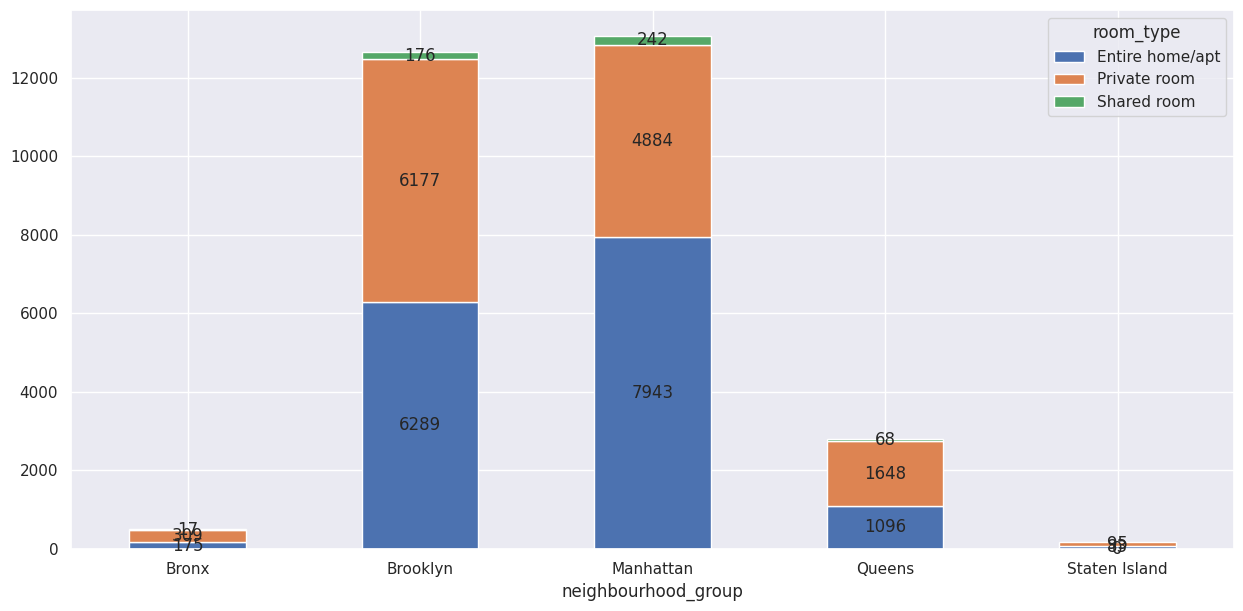

In [ ]:
NeighbourhoodvsRoomtype = pd.crosstab(df.neighbourhood_group, df.room_type)
ax = NeighbourhoodvsRoomtype.plot(kind='bar',figsize=(15,7),stacked= True, rot =0, label = True)
for c in ax.containers:
    ax.bar_label(c, label_type='center')

# Sonuç ve Değerlendirme

Airbnb şirketinin 2019 yılı New York şehrinin verilerine bakarak bu çalışma kapsamında neler yapılabilir?

1- Konaklama fiyatları ile ilgili kapsamlı bilgi elde edilebilir.  
2- En çok tercih edilen konaklama tipi ile ilgili bilgi elde edilebilir.     
3- New York şehrinin bölgelerinin konaklama tipine göre dağılımı görülebilir.   
4- Bu çalışmada yapılmadı fakat en çok yoğunluk olan tarihler çıkartılabilir.   
5- Fiyat vs Bölge, Fiyat vs Konaklama Tipi gibi karşılaştırmalarla fiyat/ fayda karşılaştırılması yapılabilir.
